Measuring How Latitude and Longitude Factors Affect Air Quality Levels

In [124]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
# Import Datasets
weatherData = pd.read_csv('cities.csv')
airPollutionData = pd.read_csv('global_air_pollution_data.csv')

In [126]:
weatherData.rename(columns={'country' : 'country_name'}, inplace=True)
weatherData.head()

,station_id,city_name,country_name,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005
1,38954,Fayzabad,Afghanistan,Badakhshan,AF,AFG,37.129761,70.579247
2,41560,Jalalabad,Afghanistan,Nangarhar,AF,AFG,34.441527,70.436103
3,38947,Kunduz,Afghanistan,Kunduz,AF,AFG,36.727951,68.872530
4,38987,Qala i Naw,Afghanistan,Badghis,AF,AFG,34.983000,63.133300


In [127]:
airPollutionData.rename(columns={'co_aqi_value\t' : 'co_aqi_value'}, inplace=True)
airPollutionData.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [128]:
# Merge both of datasets
mergeData = pd.merge(weatherData, airPollutionData, on=['city_name', 'country_name'], how='inner')
mergeData.head(596)

,station_id,city_name,country_name,state,iso2,iso3,latitude,longitude,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005,131,Unhealthy for Sensitive Groups,1,Good,43,Good,0,Good,131,Unhealthy for Sensitive Groups
1,13577,Peshkopi,Albania,Dibër,AL,ALB,41.683302,20.433303,115,Unhealthy for Sensitive Groups,1,Good,39,Good,0,Good,115,Unhealthy for Sensitive Groups
2,13615,Tirana,Albania,Durrës,AL,ALB,41.327541,19.818883,73,Moderate,1,Good,45,Good,1,Good,73,Moderate
3,60620,Adrar,Algeria,Adrar,DZ,DZA,27.869990,-0.289967,106,Unhealthy for Sensitive Groups,0,Good,45,Good,0,Good,106,Unhealthy for Sensitive Groups
4,60369,Algiers,Algeria,Alger,DZ,DZA,36.763065,3.050553,154,Unhealthy,10,Good,33,Good,69,Moderate,154,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,67663,Kabwe,Zambia,Central,ZM,ZMB,-14.440011,28.449984,27,Good,1,Good,19,Good,0,Good,27,Good
592,68030,Livingstone,Zambia,Southern,ZM,ZMB,-17.860009,25.860013,27,Good,1,Good,17,Good,0,Good,27,Good
593,67633,Mongu,Zambia,Western,ZM,ZMB,-15.279598,23.120025,43,Good,1,Good,19,Good,0,Good,43,Good
594,67775,Harare,Zimbabwe,Harare,ZW,ZWE,-17.817790,31.044709,61,Moderate,3,Good,14,Good,2,Good,61,Moderate


In [129]:
# Display the length of 'mergeData'
print("Length of 'mergeData' =", len(mergeData), "rows")

Length of 'mergeData' = 596 rows


Data Selection

In [130]:
# Drop Columns
mergeData.drop(columns=['station_id', 'state', 'iso2', 'iso3', 'aqi_category', 'co_aqi_category', 'ozone_aqi_category', 
                        'no2_aqi_category', 'pm2.5_aqi_value', 'pm2.5_aqi_category'], inplace=True)

Data Pre-processing

In [131]:
# Remove missing values in columns
mergeData.dropna(subset=['latitude', 'longitude', 'aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value'], inplace=True)
mergeData.head()

,city_name,country_name,latitude,longitude,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value
0,Asadabad,Afghanistan,34.866000,71.150005,131,1,43,0
1,Peshkopi,Albania,41.683302,20.433303,115,1,39,0
2,Tirana,Albania,41.327541,19.818883,73,1,45,1
3,Adrar,Algeria,27.869990,-0.289967,106,0,45,0
4,Algiers,Algeria,36.763065,3.050553,154,10,33,69


In [132]:
# Display the length of 'mergeData'
print("Length of 'mergeData' =", len(mergeData), "rows")

Length of 'mergeData' = 596 rows


Box Plot Visualization

In [133]:
# Calculate the standard deviation of 'aqi_value'
aqiStandardDeviation = mergeData['aqi_value'].std()
# Calculate the Interquartile Range (IQR)
sortedAqiValue = np.array(mergeData['aqi_value'].sort_values())
quartile1 = np.quantile(sortedAqiValue, 0.25)
quartile2 = np.quantile(sortedAqiValue, 0.5)
quartile3 = np.quantile(sortedAqiValue, 0.75)
IQR = quartile3 - quartile1
# Calculate the lower and upper limit
lowLimit = quartile1 - (1.5 * IQR)
upLimit = quartile3 + (1.5 * IQR)

print("Standard Deviation of 'aqi_value' =", round(aqiStandardDeviation, 2))
print("Upper limit =", upLimit)
print("Quartile 3  =", quartile3, "\nMedian      =", quartile2, "\nQuartile 1  =", quartile1)
print("Lower Limit =", lowLimit)

Standard Deviation of 'aqi_value' = 46.85
Upper limit = 140.5
Quartile 3  = 79.0 
Median      = 53.0 
Quartile 1  = 38.0
Lower Limit = -23.5


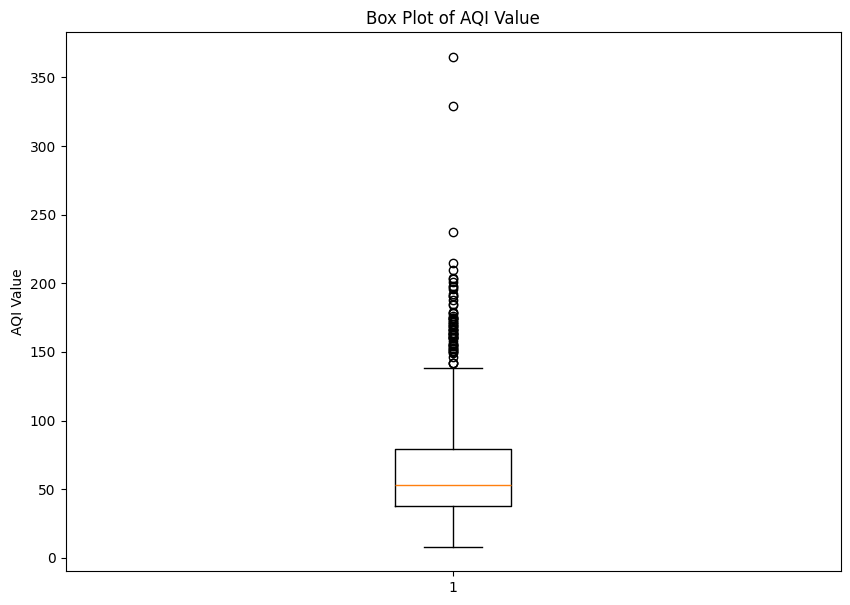

In [134]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(sortedAqiValue)
plt.title("Box Plot of AQI Value")
plt.ylabel("AQI Value")
plt.show()

Scatter Plot Visualization

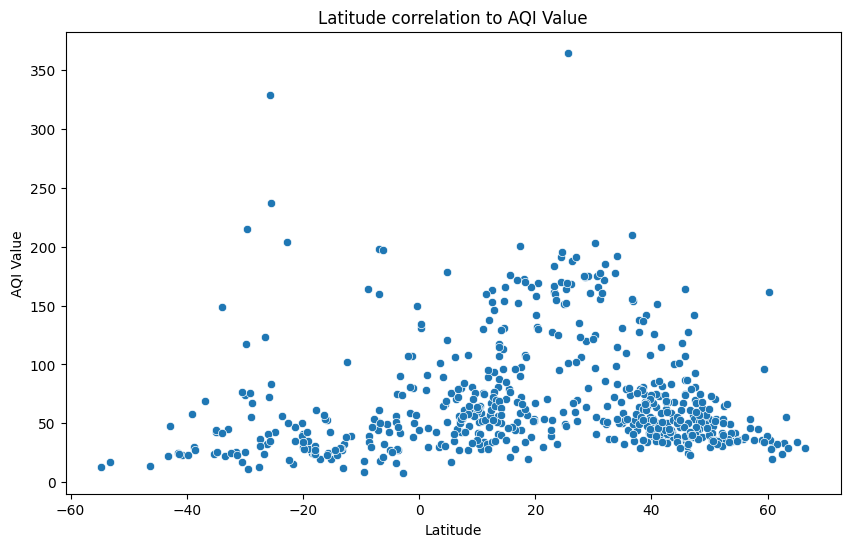

In [135]:
# Visualization of 'latitude' correlation to 'aqi_value'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mergeData, x='latitude', y='aqi_value')
plt.title("Latitude correlation to AQI Value")
plt.xlabel("Latitude")
plt.ylabel("AQI Value")
plt.show()

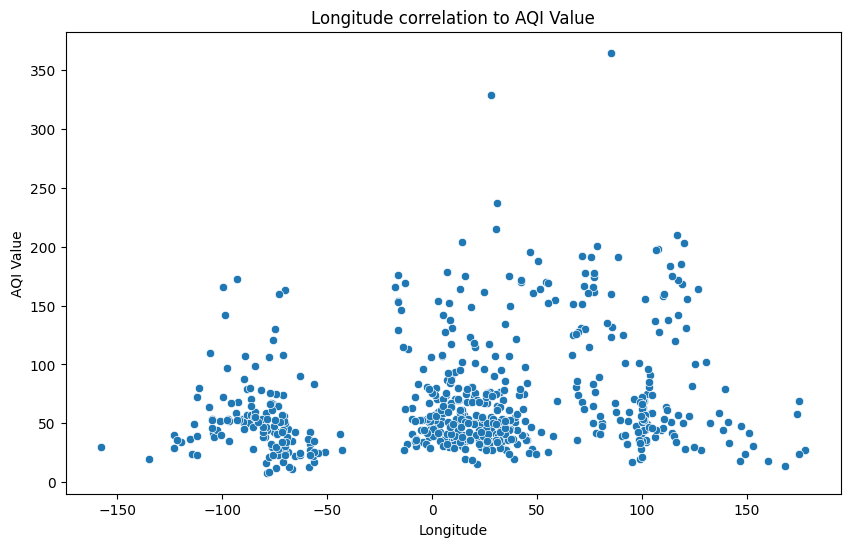

In [136]:
# Visualization of 'longitude' correlation to 'aqi_value'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mergeData, x='longitude', y='aqi_value')
plt.title("Longitude correlation to AQI Value")
plt.xlabel("Longitude")
plt.ylabel("AQI Value")
plt.show()

Data Transformation

In [137]:
# Features Selection
features = mergeData[['latitude', 'longitude', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value']]
target = mergeData['aqi_value']

Data Mining

In [138]:
# Initialize Random Forest Model
RFModel = RandomForestRegressor(n_estimators=300, random_state=42)

# Set the K-Fold Cross Validation with 5 folds
KFoldSplit = KFold(n_splits=5, shuffle=True, random_state=42)

# Array to hold the value of each prediction
aqi_value_predict = np.zeros(len(mergeData))

# List to hold the MSE value of each fold
MSEScores = []

for train_index, test_index in KFoldSplit.split(features):
    # Split data into training and testing based on fold index
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Model training
    RFModel.fit(X_train, y_train)

    # Model testing
    prediction = RFModel.predict(X_test)
    
    # Saving the prediction into array
    aqi_value_predict[test_index] = prediction

    # Calculate the MSE value then add it into the list
    mse = mean_squared_error(y_test, prediction)
    MSEScores.append(mse)

# Add the prediction value as a new column in 'mergeData'
mergeData['aqi_value_predict'] = aqi_value_predict

Data Evaluation

In [139]:
# Display the MSE values of each fold
print("MSE values of each fold =", MSEScores)

MSE values of each fold = [np.float64(431.5767408333333), np.float64(1096.9982518207282), np.float64(446.18150205415503), np.float64(397.1411862745099), np.float64(1094.9089211951448)]


In [140]:
# Calculate the average MSE value of all folds
averageMSE = np.mean(MSEScores)
print("Average MSE value =", round(averageMSE, 2))

Average MSE value = 693.36


In [141]:
# Display and sort the importance of each features
featuresImportance = pd.Series(RFModel.feature_importances_, index=features.columns)
print(round(featuresImportance.sort_values(ascending=False), 4) * 100)

co_aqi_value       41.84
ozone_aqi_value    24.68
latitude           18.24
longitude          12.53
no2_aqi_value       2.71
dtype: float64


Features Importance Visualization (Bar Plot)

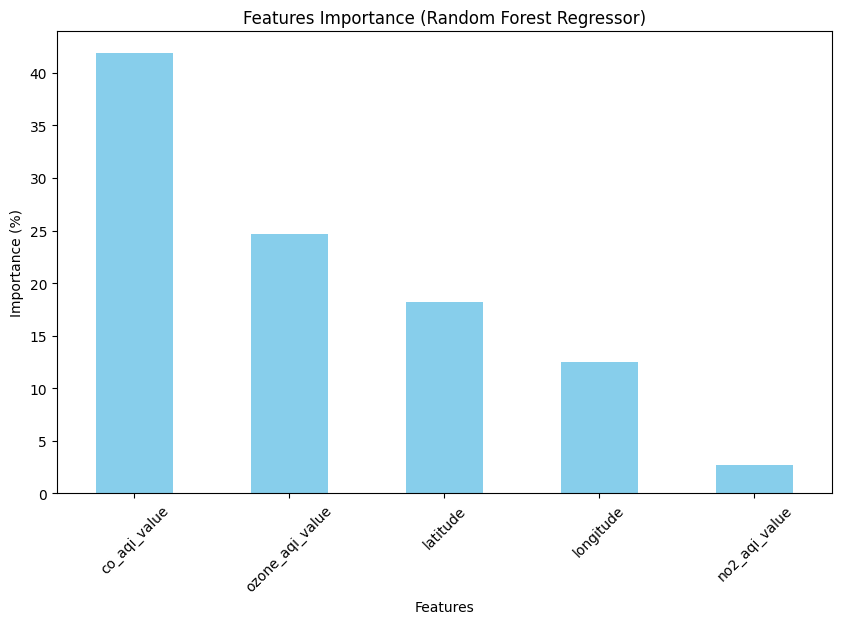

In [142]:
# Convert to DataFrame
featuresImportancesData = pd.Series(featuresImportance).sort_values(ascending=False)
# Convert to percentage
feature_importances_percent = featuresImportancesData * 100

# Visualize the importance of each features
plt.figure(figsize=(10, 6))
feature_importances_percent.plot(kind='bar', color='skyblue')
plt.xlabel("Features")
plt.ylabel("Importance (%)")
plt.title("Features Importance (Random Forest Regressor)")
plt.xticks(rotation=45)
plt.show()

Model Evaluation

In [143]:
# Calculate the percentage similarity between 'aqi_value' and 'aqi_value_predict'
mergeData['similarity_percentage'] = 100 - (abs(mergeData['aqi_value'] - mergeData['aqi_value_predict']) / mergeData['aqi_value']) * 100
average_similarity = mergeData['similarity_percentage'].mean()
# Calculate the Coefficient of Determination (R^2) Score
r2Score = r2_score(y_test, prediction)

print("Average similarity between 'aqi_value' and 'aqi_value_predict' =", round(average_similarity, 2), "%")
print("R² Score =", round(r2Score, 2))

Average similarity between 'aqi_value' and 'aqi_value_predict' = 70.75 %
R² Score = 0.6


In [144]:
mergeData.head(596)

,city_name,country_name,latitude,longitude,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,aqi_value_predict,similarity_percentage
0,Asadabad,Afghanistan,34.866000,71.150005,131,1,43,0,100.586667,76.783715
1,Peshkopi,Albania,41.683302,20.433303,115,1,39,0,49.666667,43.188406
2,Tirana,Albania,41.327541,19.818883,73,1,45,1,70.203333,96.168950
3,Adrar,Algeria,27.869990,-0.289967,106,0,45,0,100.323333,94.644654
4,Algiers,Algeria,36.763065,3.050553,154,10,33,69,170.596667,89.222944
...,...,...,...,...,...,...,...,...,...,...
591,Kabwe,Zambia,-14.440011,28.449984,27,1,19,0,45.090000,33.000000
592,Livingstone,Zambia,-17.860009,25.860013,27,1,17,0,39.453333,53.876543
593,Mongu,Zambia,-15.279598,23.120025,43,1,19,0,33.543333,78.007752
594,Harare,Zimbabwe,-17.817790,31.044709,61,3,14,2,98.076667,39.218579
